<a href="https://colab.research.google.com/github/Utkarshmishra2k2/Factor-Analysis-PCA-on-Airline-Data/blob/main/Factor%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=00f0d5b2fb9b3221ae86fd4947201fce3c1a074781fa8a6cad3d920ca05562c8
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import statsmodels.stats.outliers_influence as sms
import statsmodels.api as sm

In [4]:
from factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [6]:
from sklearn.cluster import KMeans

In [7]:
data_02 = pd.read_csv("https://raw.githubusercontent.com/UM1412/Data-Set/main/FactorAnalysisTrain.csv")

# Factor Analysis

Considering only columns including numbers rated on a Likert scale.

In [8]:
data_01 = data_02.iloc[:, 8:22]

In [9]:
data_01.sample(10)

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
45014,2,0,2,1,5,2,1,5,4,1,4,4,4,5
99191,4,4,4,3,3,4,2,3,1,5,3,1,4,3
73826,1,1,1,4,2,1,2,2,3,5,4,1,3,2
59827,4,4,4,4,3,4,4,2,2,2,2,3,2,4
48458,2,1,1,1,2,2,2,2,4,4,3,4,3,2
86303,2,2,4,2,4,5,4,4,4,4,4,2,4,2
84372,2,2,2,4,4,2,4,4,2,5,4,1,3,4
57653,4,4,4,3,2,3,3,4,4,4,4,4,4,3
11249,4,5,0,3,2,0,2,2,3,1,2,1,3,2
47446,2,2,2,4,3,3,3,2,2,2,2,2,2,2


## Factorability

### 01)Bartlett's Test of Sphericity

**The two primary tests commonly used to assess the suitability of a dataset for Factor Analysis are Bartlett's Test of Sphericity and the Kaiser-Meyer-Olkin (KMO) Test.**

Bartlett's Test of Sphericity is a tool used by researchers to determine the appropriateness of employing factor analysis to uncover the underlying structure within their data. By assessing the interrelatedness of variables through their correlation or covariance, the test assists in discerning whether these variables exhibit significant dependencies. If the test suggests that the variables are not independent, it provides support for conducting factor analysis to unveil latent factors within the dataset.

In [10]:
chi_square, p_value = calculate_bartlett_sphericity(data_01)

print("Chi-Square Statistic: ", chi_square)
print("P-value: ", p_value)

Chi-Square Statistic:  601676.8938564031
P-value:  0.0


**Interpretation**
<br/>The P-value is lower than 0.05, which means that this dataset is suitable for the Factor Analysis!

### 02) KMO-test

The Kaiser-Meyer-Olkin (KMO) measure is a statistical tool employed to evaluate the suitability of a dataset for factor analysis. It assesses the extent to which variables in the dataset share common variance, which is crucial for factor analysis. The KMO measure quantifies the proportion of variance among variables that is shared, providing insight into whether the dataset meets the fundamental assumption of factor analysis.

In [11]:
kmo_all, kmo_model = calculate_kmo(data_01)

print("KMO for All Variables:", kmo_all)
print("KMO for Model:", kmo_model)

KMO for All Variables: [0.74185992 0.75273127 0.68173114 0.7066898  0.84090996 0.73646005
 0.8328631  0.76790363 0.82883039 0.88966489 0.8147844  0.70010319
 0.78427772 0.81687404]
KMO for Model: 0.7812327154821326


**Interpretation**
<br/>The average Kaiser-Meyer-Olkin (KMO) measure for the variables exceeds 0.6, and each variable individually also has a KMO score above 0.6.
<br/>Based on these results, I concluded that this dataset is appropriately suited for the Factor Analysis.

## Standardization

In [12]:
scaler = StandardScaler()
data_03 = scaler.fit_transform(data_01)

In [13]:
data_03

array([[ 0.20357895,  0.6161719 ,  0.17377614, ...,  0.5497986 ,
         1.15643582,  1.30586973],
       [ 0.20357895, -0.69524516,  0.17377614, ..., -1.82101248,
         0.30584786, -1.74229153],
       [-0.54953343, -0.69524516, -0.54105962, ...,  0.5497986 ,
         0.30584786,  1.30586973],
       ...,
       [-1.30264581, -1.35095368, -1.25589538, ...,  1.34006895,
         1.15643582,  0.54382941],
       [-1.30264581, -1.35095368, -1.25589538, ...,  1.34006895,
         0.30584786, -1.74229153],
       [-1.30264581, -0.03953663,  0.17377614, ...,  0.5497986 ,
        -0.54474009, -1.74229153]])

## Principal Component Analaysis

In [14]:
PCA = PCA()
PCA.fit(data_03)

PCA()

##  Deciding Number of Factor

Decide on the number of principal components to retain. This decision can be based on the cumulative explained variance (usually aiming for a high cumulative variance, e.g., 65-90%) or by using criteria such as the Kaiser criterion (retain components with eigenvalues greater than 1) or scree plot inspection.

In [15]:
result = pd.DataFrame({
    "Eigen": PCA.explained_variance_,
    "Variance_ratio":PCA.explained_variance_ratio_ * 100,
    "CumulativeVariance": (PCA.explained_variance_ratio_ * 100).cumsum()
})
result.index = ['comp ' + str(i+1) for i in result.index]

result

,Eigen,Variance_ratio,CumulativeVariance
comp 1,3.800153,27.143691,27.143691
comp 2,2.362009,16.871328,44.015020
comp 3,2.165913,15.470659,59.485678
comp 4,1.063284,7.594814,67.080493
comp 5,0.950940,6.792366,73.872859
comp 6,0.700342,5.002396,78.875255
comp 7,0.539962,3.856831,82.732086
comp 8,0.514660,3.676107,86.408194
comp 9,0.469479,3.353391,89.761585
comp 10,0.368664,2.633286,92.394871


**Interpretation**

Since cumulative explained variance of Component 4 is greated than 65% we will extract 5 Components. Also Kaiser criterion Component 4 with eigenvalues greater than 1.

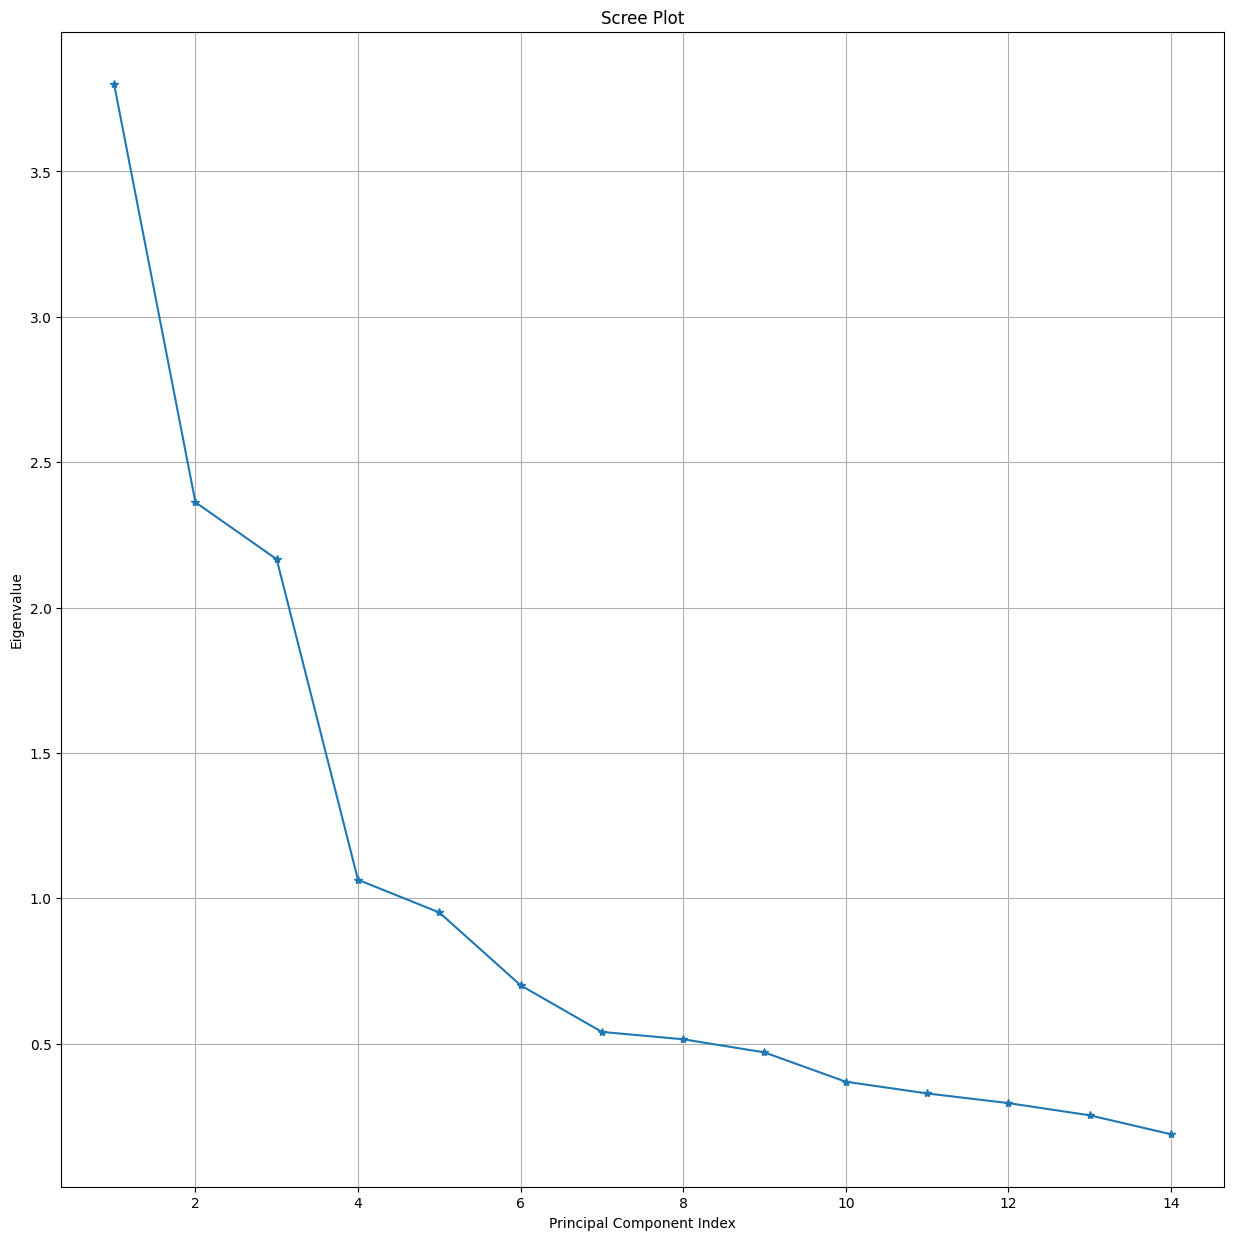

In [16]:
a = PCA.explained_variance_
num_components = len(a)
plt.figure(figsize=(15,15))
plt.plot(np.arange(1, 15), a, marker="*", linestyle="-")
plt.title('Scree Plot')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

Point at Component 4 shows elbow.Thus we can conclude Components before and incuding 4 capture most of the variance in the data, while components after the elbow capture less significant variance.

## Factor Analysis Type

### Rotation == None

In [17]:
Factor_01 = FactorAnalyzer(n_factors=4, rotation=None)
Factor_01.fit(data_03)

FactorAnalyzer(n_factors=4, rotation=None, rotation_kwargs={})

In [18]:
laoding_01 = pd.DataFrame(Factor_01.loadings_, index=data_01.columns, columns=[f'Factor{i+1}' for i in range(4)])
laoding_01

,Factor1,Factor2,Factor3,Factor4
Inflight wifi service,0.436964,0.642330,-0.071070,-0.113172
Departure/Arrival time convenient,0.170795,0.499915,0.017415,0.267577
Ease of Online booking,0.318761,0.831328,-0.093139,-0.054253
Gate location,0.117491,0.544223,-0.061499,0.402441
Food and drink,0.577952,-0.239136,-0.422823,0.160637
Online boarding,0.531925,0.236741,-0.214547,-0.540685
Seat comfort,0.648590,-0.230073,-0.383679,-0.021789
Inflight entertainment,0.837816,-0.277389,-0.042800,0.158397
On-board service,0.480882,-0.071425,0.513292,-0.036392
Leg room service,0.356708,0.002581,0.341591,-0.063380


### Rotation == Promax

In [19]:
Factor_02 = FactorAnalyzer(n_factors=4, rotation="Promax")
Factor_02.fit(data_03)

FactorAnalyzer(n_factors=4, rotation_kwargs={})

In [20]:
laoding_02 = pd.DataFrame(Factor_02.loadings_, index=data_01.columns, columns=[f'Factor{i+1}' for i in range(4)])
laoding_02

,Factor1,Factor2,Factor3,Factor4
Inflight wifi service,-0.017943,0.041272,0.499750,0.464001
Departure/Arrival time convenient,0.016234,0.054087,0.606817,-0.068733
Ease of Online booking,-0.128669,-0.049021,0.665939,0.450739
Gate location,0.082610,-0.041434,0.730367,-0.187674
Food and drink,0.810338,-0.120425,0.057920,-0.032733
Online boarding,0.088286,-0.041303,-0.092479,0.823187
Seat comfort,0.732636,-0.065415,-0.053318,0.169248
Inflight entertainment,0.747024,0.367021,0.058879,-0.080358
On-board service,-0.013403,0.715014,-0.013177,-0.008602
Leg room service,-0.027662,0.483435,0.008883,0.061796


### Rotation == Quartimax

In [21]:
Factor_03 = FactorAnalyzer(n_factors=4, rotation="quartimax")
Factor_03.fit(data_03)

FactorAnalyzer(n_factors=4, rotation='quartimax', rotation_kwargs={})

In [22]:
laoding_03 = pd.DataFrame(Factor_03.loadings_, index=data_01.columns, columns=[f'Factor{i+1}' for i in range(4)])
laoding_03

,Factor1,Factor2,Factor3,Factor4
Inflight wifi service,0.137317,0.102506,0.753092,0.157713
Departure/Arrival time convenient,-0.004638,0.063405,0.529769,-0.257467
Ease of Online booking,-0.000729,0.010143,0.893402,0.077860
Gate location,-0.001754,-0.032914,0.565029,-0.394183
Food and drink,0.768579,-0.055659,0.022623,-0.038420
Online boarding,0.353890,0.052620,0.411232,0.616638
Seat comfort,0.772623,0.009947,0.046209,0.148681
Inflight entertainment,0.800099,0.404873,0.033808,-0.024047
On-board service,0.146063,0.687815,0.039881,0.071601
Leg room service,0.102396,0.471375,0.084810,0.089870


### Rotation == Orthogonal

In [23]:
Factor_04 = FactorAnalyzer(n_factors=4, rotation="geomin_ort")
Factor_04.fit(data_03)

FactorAnalyzer(n_factors=4, rotation='geomin_ort', rotation_kwargs={})

In [24]:
laoding_05 = pd.DataFrame(Factor_04.loadings_, index=data_01.columns, columns=[f'Factor{i+1}' for i in range(4)])
laoding_05

,Factor1,Factor2,Factor3,Factor4
Inflight wifi service,0.144830,0.100485,0.764733,0.074131
Departure/Arrival time convenient,-0.001028,0.070291,0.497639,-0.313687
Ease of Online booking,0.013779,0.003199,0.896407,-0.024224
Gate location,0.006769,-0.020705,0.516146,-0.456993
Food and drink,0.770473,-0.012509,0.004951,-0.044599
Online boarding,0.361048,0.046810,0.473310,0.566385
Seat comfort,0.772527,0.046070,0.050220,0.140869
Inflight entertainment,0.777361,0.448140,0.021590,-0.014717
On-board service,0.109806,0.691382,0.051949,0.091525
Leg room service,0.078738,0.472162,0.097299,0.096669


### Rotation == Varimax

In [25]:
Factor_05 = FactorAnalyzer(n_factors=4, rotation="varimax")
Factor_05.fit(data_03)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [26]:
laoding = pd.DataFrame(Factor_05.loadings_, index=data_01.columns, columns=[f'Factor{i+1}' for i in range(4)])

In [27]:
laoding

,Factor1,Factor2,Factor3,Factor4
Inflight wifi service,0.092606,0.132303,0.605630,0.478035
Departure/Arrival time convenient,-0.006287,0.057166,0.589643,0.000283
Ease of Online booking,-0.036124,0.027503,0.766509,0.463396
Gate location,0.013097,-0.045142,0.680813,-0.100044
Food and drink,0.770130,0.002845,0.032987,0.040034
Online boarding,0.286895,0.118512,0.094301,0.756382
Seat comfort,0.754094,0.078646,-0.028100,0.213668
Inflight entertainment,0.766237,0.464666,0.041222,0.032708
On-board service,0.087931,0.700438,0.010385,0.051850
Leg room service,0.057541,0.483208,0.040559,0.097485


**Factor Making**


In assigning names to each factor, we considered the three primary elements exhibiting the highest loading scores.

Factor 1 is labeled "Inflight Comfort & Quality" due to its strong association with aspects enhancing the quality of time spent inside the aircraft.
- Cleanliness (0.854)
- Food and drink (0.77)
- Inflight entertainment (0.766)
- Seat Comfort (0.754)

Factor 2 is denoted as "Customer Service Quality" since it primarily encompasses components linked to the provision of high-quality service throughout the entire journey, from boarding to arrival.
- Inflight service (0.799)
- Baggage handling (0.76)
- On-board service (0.7)
- Leg Room (0.4832)

Factor 3 is titled "Convenience and Efficiency" as it predominantly reflects elements aimed at optimizing time efficiency during the entire travel experience.
- Ease of online booking (0.766)
- Gate location (0.68)
- Departure | Arrival Time Confinent (05.8964)

The fourth and final factor is named "Technological Accessibility" owing to its strong association with technological advancements facilitating convenient access to flight-related services.
- Online boarding (0.7565)
- Inflight Wi-Fi service (0.478)
- Ease of online booking (0.463)

In [28]:
data_04 = Factor_04.transform(data_01)

In [29]:
data_05 = pd.DataFrame()

In [30]:
data_05['Inflight Comfort and Quality'] = data_04[:, 0]
data_05['Customer Service Quality'] = data_04[:, 1]
data_05['Convenience and Efficiency'] = data_04[:, 2]
data_05['Technological Accessibility'] = data_04[:, 3]

In [31]:
data_01.shape

(103904, 14)

In [32]:
data_05.shape

(103904, 4)

In [33]:
data_05.corr(method = 'pearson')

,Inflight Comfort and Quality,Customer Service Quality,Convenience and Efficiency,Technological Accessibility
Inflight Comfort and Quality,1.000000,0.061755,0.011849,0.047772
Customer Service Quality,0.061755,1.000000,0.006162,0.001350
Convenience and Efficiency,0.011849,0.006162,1.000000,-0.001862
Technological Accessibility,0.047772,0.001350,-0.001862,1.000000


In [34]:
(pd.DataFrame(Factor_05.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'],columns = ["Inflight Comfort and Quality","Customer Service Quality","Convenience and Efficiency","Technological Accessibility"]))

,Inflight Comfort and Quality,Customer Service Quality,Convenience and Efficiency,Technological Accessibility
Variance,2.598482,2.294472,1.784914,1.117529
Proportional Var,0.185606,0.163891,0.127494,0.079824
Cumulative Var,0.185606,0.349497,0.476991,0.556814


In [35]:
pd.DataFrame(Factor_05.get_communalities(),index=laoding.index,columns=['Communalities'])

,Communalities
Inflight wifi service,0.621384
Departure/Arrival time convenient,0.350986
Ease of Online booking,0.804333
Gate location,0.475724
Food and drink,0.595799
Online boarding,0.677361
Seat comfort,0.621287
Inflight entertainment,0.805802
On-board service,0.501142
Leg room service,0.247949


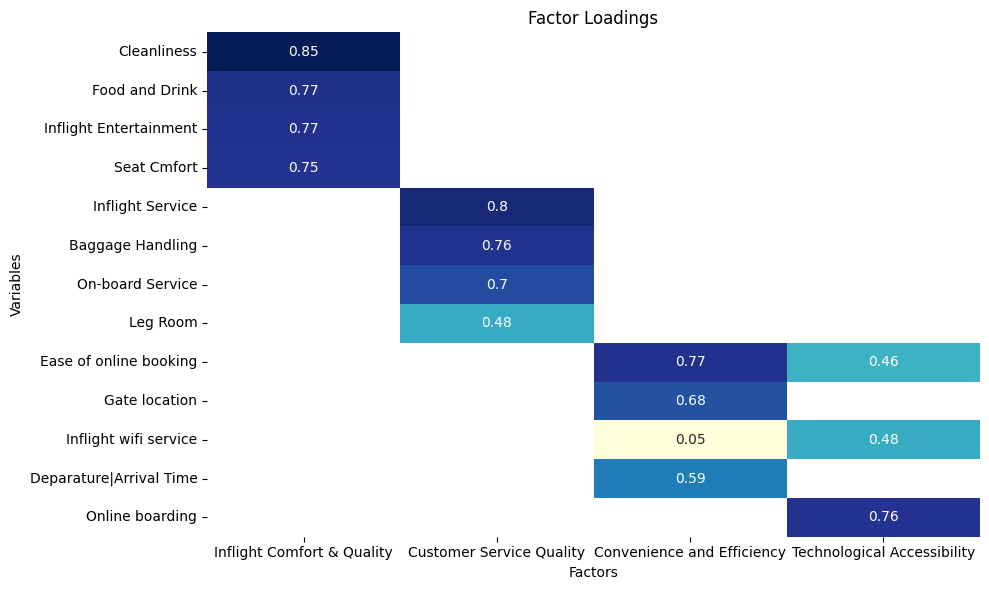

In [36]:
factor_loadings = {
    "Inflight Comfort & Quality": {"Cleanliness": 0.854, "Food and Drink": 0.77, "Inflight Entertainment": 0.766,"Seat Cmfort":0.754},
    "Customer Service Quality": {"Inflight Service": 0.799, "Baggage Handling": 0.76, "On-board Service": 0.7,"Leg Room":0.4832},
    "Convenience and Efficiency": {"Ease of online booking": 0.766, "Gate location": 0.68, "Inflight wifi service": 0.05,"Deparature|Arrival Time":0.589},
    "Technological Accessibility": {"Online boarding": 0.7565, "Inflight wifi service": 0.478, "Ease of online booking": 0.463}
}
factor_loadings_df = pd.DataFrame.from_dict(factor_loadings, orient='index')
factor_loadings_df = factor_loadings_df.transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(factor_loadings_df, annot=True, cmap="YlGnBu", cbar=False)
plt.title('Factor Loadings')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Logastics Regression

### Label Encoding

In [37]:
label_encoder = LabelEncoder()

In [38]:
data_05["Result"] = label_encoder.fit_transform(data_02['satisfaction'])

In [39]:
data_05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 5 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Inflight Comfort and Quality  103904 non-null  float64
 1   Customer Service Quality      103904 non-null  float64
 2   Convenience and Efficiency    103904 non-null  float64
 3   Technological Accessibility   103904 non-null  float64
 4   Result                        103904 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 MB


In [40]:
Y = data_05["Result"]
X = sm.add_constant(data_05[['Inflight Comfort and Quality', 'Customer Service Quality','Convenience and Efficiency', 'Technological Accessibility']])

In [41]:
X

,const,Inflight Comfort and Quality,Customer Service Quality,Convenience and Efficiency,Technological Accessibility
0,1.0,4.767504,4.224873,2.869419,-0.222961
1,1.0,0.552105,2.917149,3.354205,0.409100
2,1.0,4.993061,3.755699,2.347419,1.100362
3,1.0,1.566439,3.135665,4.571692,-1.922587
4,1.0,3.445270,3.016621,3.590105,1.095068
...,...,...,...,...,...
103899,1.0,1.675933,2.993118,2.217515,-0.351076
103900,1.0,3.734432,5.274266,4.362340,-0.158693
103901,1.0,3.942421,3.983293,1.062282,-1.349989
103902,1.0,0.608169,3.302246,1.687920,-1.061763


**Binary Target Variable**

In [42]:
print(data_02['satisfaction'].value_counts())

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


In [43]:
print(data_05["Result"].value_counts())

0    58879
1    45025
Name: Result, dtype: int64


**Interpretation**

There are only two outcomes (i.e. binary classification of "neutral or dissatisfied" or did "satisfied"), so we will be using Binary Logistic Regression (which is the default method we use when we specify family=Binomial in our logit models earlier)


In [44]:
model  = sm.Logit(Y, X).fit_regularized(alpha=0.1)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4681519207332703
            Iterations: 22
            Function evaluations: 22
            Gradient evaluations: 22


/usr/local/lib/python3.10/dist-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 4 out of 5 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


In [45]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:               103904
Model:                          Logit   Df Residuals:                   103899
Method:                           MLE   Df Model:                            4
Date:                Sun, 03 Mar 2024   Pseudo R-squ.:                  0.3158
Time:                        03:50:34   Log-Likelihood:                -48641.
converged:                       True   LL-Null:                       -71094.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -6.6653      0.047   -142.847      0.000      -6.757      -6.574
Inflight Comfort and Quality     0.7408      0.007    104.036      0.000     

Hypothesis:


Ho:All variables are not significant vs H1: Not Ho



Desion Criteria:

Since all p-value is less that 0.05(i.e., signifance level) we reject Ho i.e., All variable are significant

**The Logestioc Regression Equation is Given as**

**log(p/(1-p)) =  -6.6653 +  0.7408 * Inflight Comfort and Quality + 0.7172 * Customer Service Quality + 0.4942 * Convenience and Efficiency + 0.9806 * Technological Accessibility**



# K Means

In [46]:
data_06 = data_02.iloc[:, 8:22]
data_06["Result"] = data_02['satisfaction']

In [47]:
X = data_06.drop(columns=["Result"])
y = data_06["Result"]

In [48]:
data_06

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Result
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2,neutral or dissatisfied
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4,satisfied
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4,neutral or dissatisfied
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1,neutral or dissatisfied


In [49]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_encoded = label_encoder.fit_transform(y)

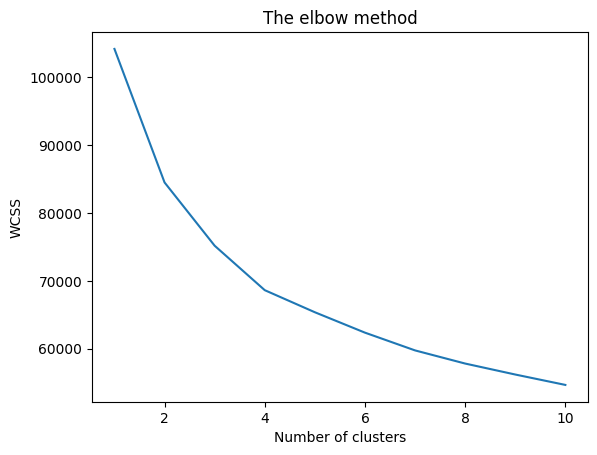

In [50]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [51]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [52]:
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [53]:
cluster_centers = kmeans.cluster_centers_

In [54]:
labels = kmeans.labels_

In [55]:
correct_labels = sum(y_encoded == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y_encoded.size))

Result: 40398 out of 103904 samples were correctly labeled.


In [56]:
inertia = kmeans.inertia_

In [57]:
silhouette_score = metrics.silhouette_score(X_scaled, labels, metric='euclidean')

In [58]:
print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.1500143336478502


In [59]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.39
